# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

from IPython.display import display
import warnings
warnings.filterwarnings("ignore") # To ignore warning messages while executing the code.

RANDOM_STATE = 0 # for reproducibility

Load feature names.

In [2]:
feature_names = []
with open('./Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names), '\n First 10 feature names: \n', feature_names[:10])

Loaded feature names: 126 
 First 10 feature names: 
 ['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth']


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('./Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print ('train_data shape: ',train_data.shape, '\n test_data shape: ', test_data.shape)

train_data shape:  (7000, 126) 
 test_data shape:  (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

,K,Total Variance Explained
1,1,0.164043
2,2,0.297278
3,3,0.399013
4,4,0.469646
5,5,0.508313
6,6,0.545121
7,7,0.576403
8,8,0.603740
9,9,0.629905
10,10,0.652213


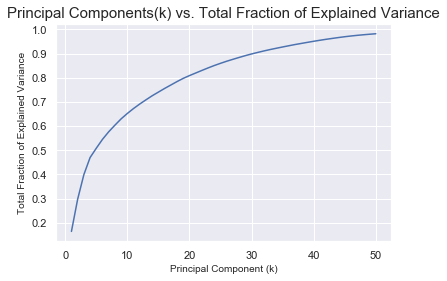

In [4]:
def P1():
### STUDENT START ###
    K, TotalVariance = [],[] # Creating empty lists for 'k' and corresponding 'Total Fraction of Explained Variance'
    for k in range(1,51): # Looping over different 'k' values ranging from 1 to 50
        pca = PCA(n_components = k, random_state = RANDOM_STATE) # Assigning PCA class to a variable
        pca.fit(train_data) # Fitting the train_data to PCA         
        K.append(k), TotalVariance.append(pca.explained_variance_ratio_.sum()) # Appeninding 'k' and corresponding 'total fraction of vairance explained' to the parent lists.
    
    # DataFrame representation
    df = pd.DataFrame({'K': np.array(K), 'Total Variance Explained': np.array(TotalVariance)}) # Creating a DatFrame with 'k' value and corresponding total fraction of vairance explained
    df.index += 1 # Dataframe index to start from 1 instead of 0
    display(df) # Display the data frame 
    
    #Plotting
    plt.plot(np.array(K), np.array(TotalVariance)) # Plotting 'k' vs. 'Total Fraction of Explained Variance'  
    plt.xlabel('Principal Component (k)', fontsize = 10) # xlabel of the plot 
    plt.ylabel('Total Fraction of Explained Variance', fontsize = 10) # ylabel of the plot
    plt.title('Principal Components(k) vs. Total Fraction of Explained Variance', fontsize = 15) # title of the plot
    plt.show() # plotting the figure    
    return None
### STUDENT END ###

P1()

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

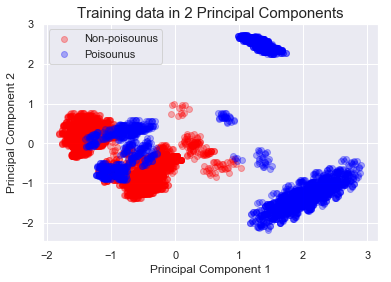

In [5]:
def P2():
### STUDENT START ###
    pca = PCA(n_components = 2, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2)to a variable
    train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data on PCA  
    plt.scatter(train_data_2dim[train_labels == 0, 0], train_data_2dim[train_labels == 0, 1], color = 'red', alpha = 0.3, label = 'Non-poisounus')
    plt.scatter(train_data_2dim[train_labels == 1, 0], train_data_2dim[train_labels == 1, 1], color = 'blue', alpha = 0.3, label = 'Poisounus')
    plt.xlabel('Principal Component 1', fontsize = 12) # xlabel of the plot 
    plt.ylabel('Principal Component 2', fontsize = 12) # ylabel of the plot
    plt.legend(loc='best', shadow=False, scatterpoints=1) # legend location
    plt.title('Training data in 2 Principal Components', fontsize = 15) # title of the plot
    plt.show()  # plotting the figure    
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

In [6]:
# Function to get the farthest distance from a centre to bunch of points in the 2-D space
def farthestDistance(Centre, Data):
    from scipy.spatial.distance import euclidean # Importing 'euclidean' to calculate the distance between two points
    farthest_dist = 0.0 # Initializing the farthest distance to 0.0
    for data in Data: # Looping over all the data points in the 2-D pace
        dist = euclidean(Centre, data) # Calculating 'euclidean' distance (between centre and data point) and storing in 'dist'
        if dist >= farthest_dist: farthest_dist = dist # Setting the farthest distance equal to dist if dist is greater than previous farthest distance            
    return farthest_dist
 

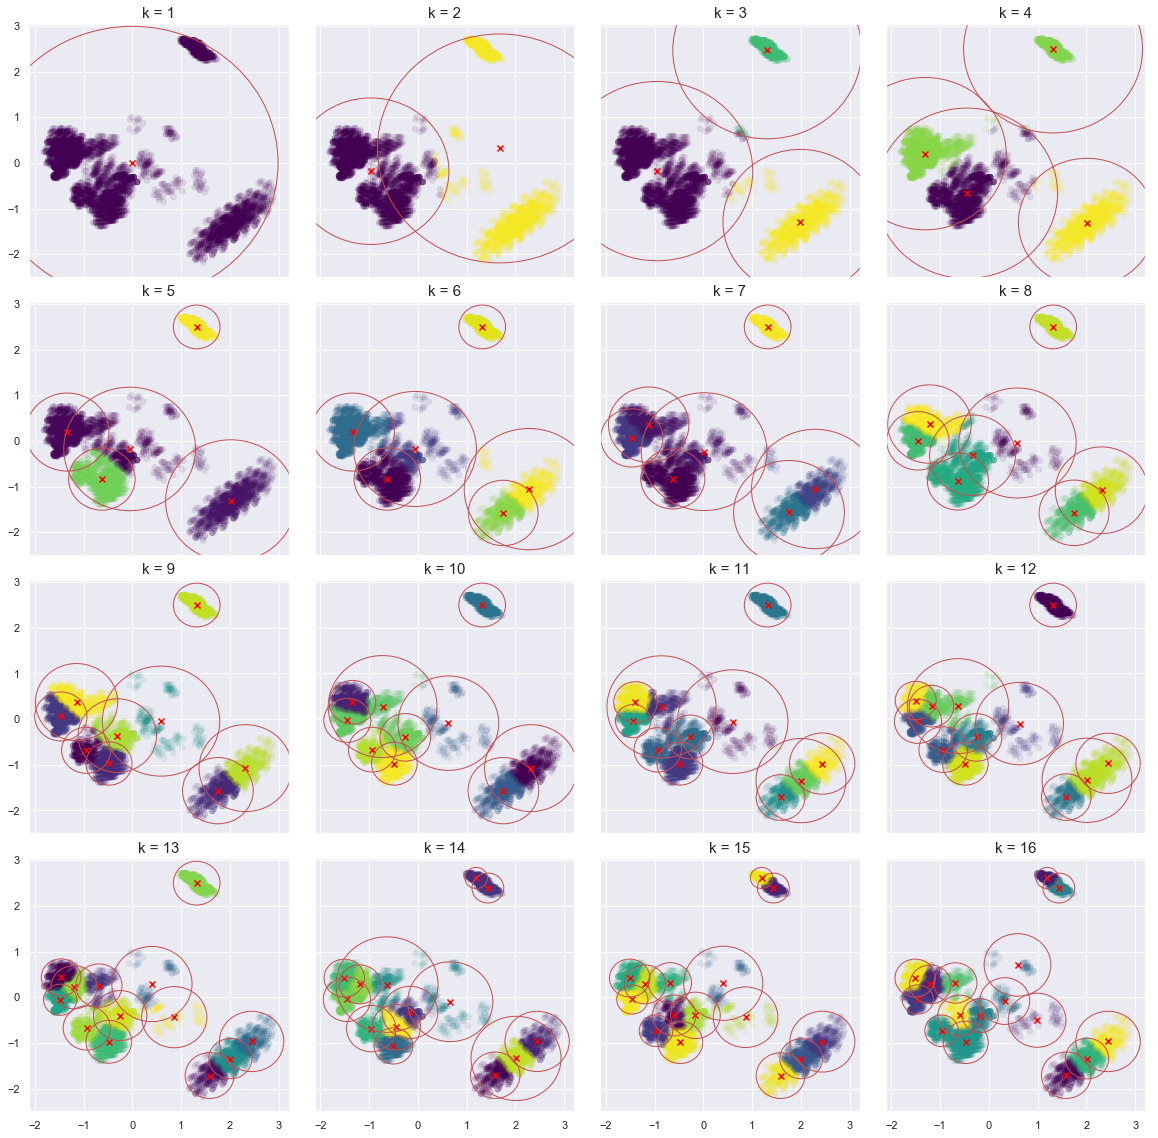

In [7]:
def P3():
### STUDENT START ###  
    
    # Transforming the 126-dim training data to 2-dim Principal Components
    pca = PCA(n_components = 2, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2) to a variable
    train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data to PCA 
    
    # Training a KMeans Clustering algorithm on the transformed train_data
    fig, axs = plt.subplots(4,4, figsize=(20,20), facecolor='w', edgecolor='k',  sharex=True, sharey=True) # Creating a 4x4 subplots
    fig.subplots_adjust(hspace = .1, wspace=.1) # Adjusting the sapce between subplots
    axs = axs.ravel() # Flattened array of axes.
    for k in range(1,17): # Looping over 'k' from 1 to 16
        Kmeans = KMeans(n_clusters=k, random_state = RANDOM_STATE) # Assigning KMeans Classifier class (with n_clusters = k) to a variable
        Kmeans.fit_transform(train_data_2dim) # Fitting the train_data_2dim data to KMeans classifier
        Centroids = Kmeans.cluster_centers_ # centers of the clusters (for k clusters)
        Labels = Kmeans.labels_ # Labels of the fitted data (for k clusters)
        color = np.random.rand(k) # Choosing 'k' distinct colours for plotting
        colors = [color[i] for i in Labels] # Choosing the distinct color for each distinct label
        axs[k-1].scatter(train_data_2dim[:,0], train_data_2dim[:,1], alpha = 0.1,  c=colors, linewidths=0.5, cmap='viridis') # Plotting the fitted data
        axs[k-1].scatter(Centroids[:,0], Centroids[:,1], color = 'red', edgecolors='k', linewidths=15, marker = 'x') # Marking('x') the centres of the clusters
        axs[k-1].set_title('k = ' + str(k), fontsize = 15) # Setting the title of the plot
        for c in range(Centroids.shape[0]): # Looping over all the centres of the clusters
            label_data = train_data_2dim[Labels == c] # Seperating data for each label
            centre = (Centroids[c][0], Centroids[c][1]) # Corresponding centre
            radius = farthestDistance(centre, label_data) # Calculating the farthest distance from centre to the labeled data      
            circle = plt.Circle(centre, radius, color='r', fill=False) # Creating the circle
            axs[k-1].add_artist(circle) # Adding cicrle to the plot
                
    plt.show() # Showing the plot 
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

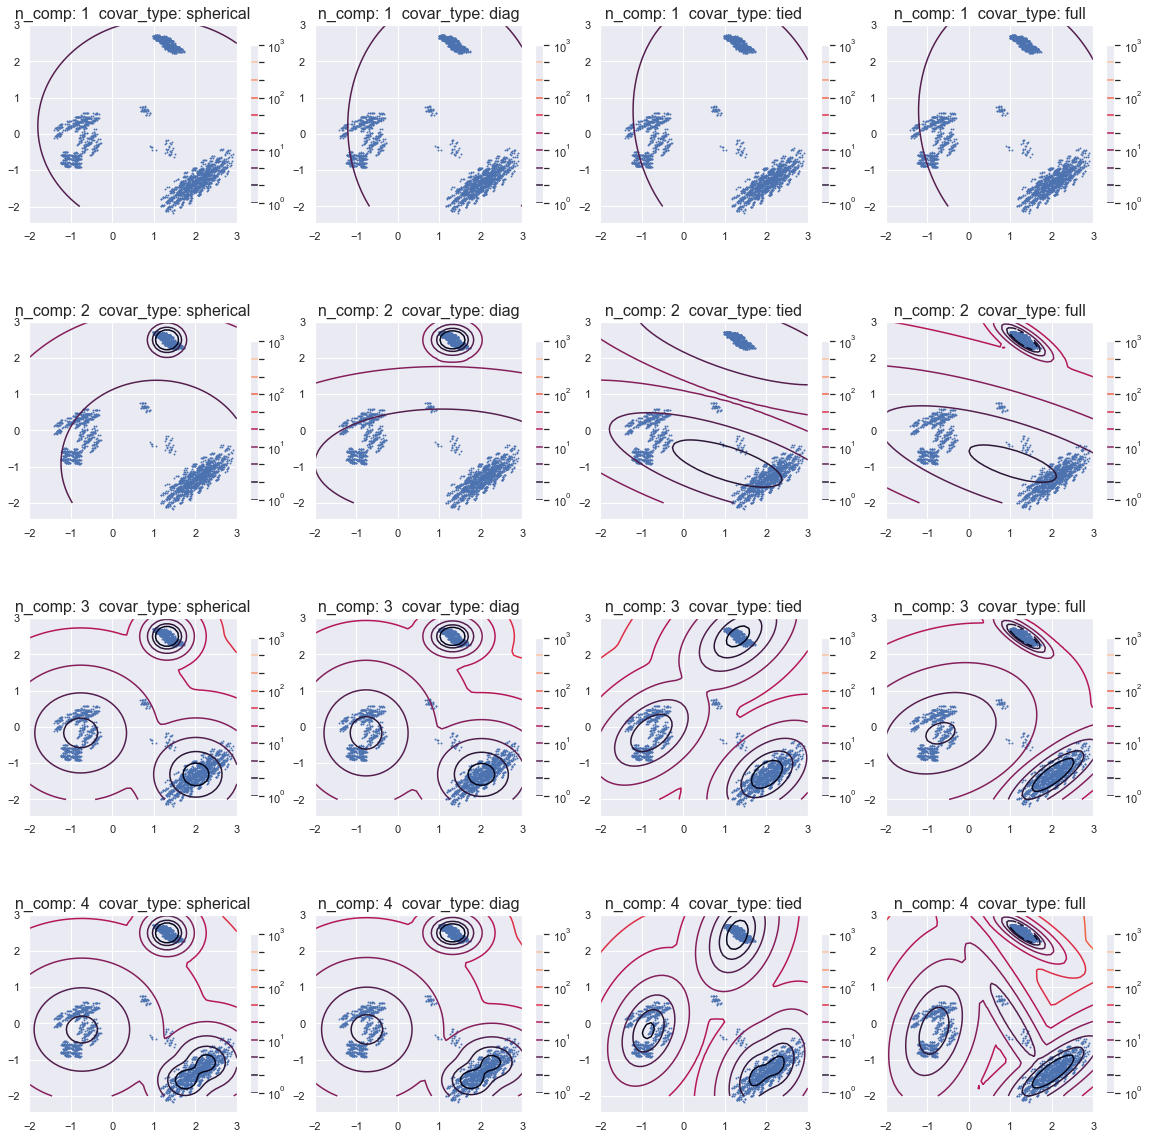

In [8]:
def P4():
### STUDENT START ###
    # Transforming the 126-dim training data to 2-dim Principal Components
    pca = PCA(n_components = 2, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2) to a variable
    train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data on PCA 
    positive_data_2dim = train_data_2dim[train_labels == 1] # Positive labeled 'train_data_2dim' data
    
    # Gaussian Mixture Model with two components from 1 to 4
    covariance_type = ['spherical', 'diag', 'tied', 'full'] # Covariances that can be passed as an input argument to the GMM 
    i = 0 # Initializing counter variable to zero
    fig=plt.figure(figsize=(20,20)) # Setting the size of the figure for plotting
    for n_comp in range(1,5): # Looping over different 'n_comp' (from 1 to 4)
        for cov_type in covariance_type: # Looping over different covariances mentioned above
            i = i + 1 # Increasing the counter varaible by 1
            plt.subplot(4,4,i) # Plotting the subplots
            clf = GaussianMixture(n_components = n_comp, covariance_type = cov_type, random_state = RANDOM_STATE)# Assigning GMM Classifier class (with n_components = n_comp) to a variable
            clf.fit(positive_data_2dim) # Fitting the data to the GMM model
            
            # display predicted scores by the model as a contour plot
            x = np.linspace(-2., 3.) # Defining x-limits of the plot
            y = np.linspace(-2., 3.) # Defining y-limits of the plot
            X, Y = np.meshgrid(x, y) # Creating a meshgrid of the plot
            XX = np.array([X.ravel(), Y.ravel()]).T # Creaing an array of the space grid
            Z = -clf.score_samples(XX) # Calculating the score of each point in the space grid
            Z = Z.reshape(X.shape) # Reshaping the scores align with the shape of X
            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)) # Plotting the contours
            CB = plt.colorbar(CS, shrink=0.8, extend='both') # Plotting the colorbar for the contours
            plt.scatter(positive_data_2dim[:, 0], positive_data_2dim[:, 1], .8) # Plotting the data on to the contours
            plt.title('n_comp: ' + str(n_comp) + '  covar_type: ' + cov_type, fontsize = 16)  # Setting the title of the plot          
            plt.subplots_adjust(hspace = 0.5, wspace=.1) # to provide height-space between subplots
    plt.show()
    
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
def P5():
### STUDENT START ###
    # Transforming the 126-dim training data to 2-dim Principal Components
    pca = PCA(n_components = 2, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2) to a variable
    train_data_2dim = pca.fit_transform(train_data) # Fit_transforming the train_data to PCA 
    positive_data_2dim = train_data_2dim[train_labels == 1]  # Positive labeled 'train_data_2dim' data
    negative_data_2dim = train_data_2dim[train_labels == 0]  # Negative labeled 'train_data_2dim' data   
    test_data_2dim = pca.transform(test_data)
    
    
    # Fit a Gaussian Mixture Model with 4 components on positive labeled-data  
    clf_positive = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = RANDOM_STATE) # Assigning GMM Classifier class (with n_components = 4) to a variable
    clf_positive.fit(positive_data_2dim) # Fitting the data to the GMM model
    predict_pos = clf_positive.score_samples(test_data_2dim) # Predicting the probability scores of the positive labeled data   
    
     # Fit a Gaussian Mixture Model with 4 components on negative labeled-data  
    clf_negative = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = RANDOM_STATE) # Assigning GMM Classifier class (with n_components = 4) to a variable
    clf_negative.fit(negative_data_2dim)  # Fitting the data to the GMM model
    predict_neg = clf_negative.score_samples(test_data_2dim) # Predicting the probability scores of the Negative labeled data   
    
    predict = np.zeros(test_labels.shape) # Creating a zero array of shape test_label
    for i in range(test_labels.shape[0]): # Looping over indices of each test_label
        if predict_pos[i].max() >= predict_neg[i].max():  predict[i] = 1   # For each data point, determining the prediction based on which of the above 2 classsifiers has the more probability score        
       
    accuracy = metrics.accuracy_score(test_labels, predict)  # Calculating the accuracy of the classifiers  
    print('Accuracy of GMM model on test data: ',accuracy)
   
### STUDENT END ###

P5()

Accuracy of GMM model on test data:  0.9501779359430605


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [10]:
def P6():
### STUDENT START ###
    # Transforming the 126-dim training data to 2-dim Principal Components
    best_accuracy = 0.0 # Initializing the best_accuracy to zero
    for pca_comp in range(2,7): # Looping over different PCA components (from 2 to 6)
        pca = PCA(n_components = pca_comp, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 2) to a variable
        train_data_ndim = pca.fit_transform(train_data) # Fit_transforming the train_data to PCA 
        positive_data_ndim = train_data_ndim[train_labels == 1]   # Positive labeled 'train_data_2dim' data
        negative_data_ndim = train_data_ndim[train_labels == 0]   # Negative labeled 'train_data_2dim' data   
        test_data_ndim = pca.transform(test_data)                 # Transforming the test_data to PCA components
        covariance_type = ['spherical', 'diag', 'tied', 'full'] # Covariances that can be passed as an input argument to the GMM 
        dict = {'spherical':[], 'diag':[], 'tied':[], 'full':[]} # Creating a dictionary of each model        
        for n_comp in range(1,11):  # Looping over different GMM n_components (from 1 to 10)
            for cov_type in covariance_type: # Looping over each covariance type
                # Fit a Gaussian Mixture Model with 4 components on positive labeled-data  
                clf_positive = GaussianMixture(n_components = n_comp, covariance_type = cov_type, random_state = RANDOM_STATE)# Assigning GMM Classifier class (with n_components = n_comp) to a variable
                clf_positive.fit(positive_data_ndim)  # Fitting the data to the GMM model
                predict_pos = clf_positive.score_samples(test_data_ndim)  # Predicting the probability scores of the positive labeled data         

                 # Fit a Gaussian Mixture Model with 4 components on negative labeled-data  
                clf_negative = GaussianMixture(n_components = n_comp, covariance_type = cov_type, random_state = RANDOM_STATE) # Assigning GMM Classifier class (with n_components = n_comp) to a variable
                clf_negative.fit(negative_data_ndim)  # Fitting the data to the GMM model
                predict_neg = clf_negative.score_samples(test_data_ndim) # Predicting the probability scores of the negative labeled data     

                predict = np.zeros(test_labels.shape) # Creating a zero array of shape test_label
                for i in range(test_labels.shape[0]): # Looping over indices of each test_label
                    if predict_pos[i].max() >= predict_neg[i].max():  predict[i] = 1    # For each data point, determining the prediction based on which of the above 2 classsifiers has the more probability score                

                accuracy = metrics.accuracy_score(test_labels, predict)  # Calculating the accuracy of the classifiers   
                
                dict[cov_type].append(accuracy) # Updating the dictionary of models with corresponding accuracy
                if accuracy >= best_accuracy and (2*pca_comp)*n_comp*2 <= 50: # Checking if the accuracy is more than the best_accuracy and checking for the total number of paramters trained are less than 50
                    best_accuracy = accuracy # Updating the best_accuracy value based on above condition
                    best_params = 'pca_'+str(pca_comp)+'-covariance_'+cov_type+'-ncomp_'+str(n_comp) # Updating the best_parameters values based on above condition
        print('Principal Components:', str(pca_comp))
        params = pd.DataFrame(dict, index=np.arange(10)) # Creating a dataframe of the model
        params.index += 1 # Setting the index to start at 1 for the daframe
        display(params) # Displaying the datafarame
    print('Best accuracy: {}; best parameters: {}'.format(np.round(best_accuracy, 4), best_params))
### STUDENT END ###

P6()

Principal Components: 2


,spherical,diag,tied,full
1,0.860320,0.862100,0.862100,0.862100
2,0.876335,0.872776,0.889680,0.909253
3,0.945730,0.947509,0.944840,0.935943
4,0.945730,0.939502,0.945730,0.950178
5,0.945730,0.941281,0.945730,0.949288
6,0.942171,0.944840,0.945730,0.949288
7,0.931495,0.939502,0.944840,0.958185
8,0.952847,0.956406,0.951957,0.956406
9,0.954626,0.956406,0.954626,0.957295
10,0.957295,0.959075,0.957295,0.962633


Principal Components: 3


,spherical,diag,tied,full
1,0.871886,0.869217,0.865658,0.865658
2,0.868327,0.859431,0.854982,0.818505
3,0.906584,0.913701,0.923488,0.909253
4,0.959964,0.955516,0.950178,0.958185
5,0.961744,0.951068,0.949288,0.958185
6,0.955516,0.951957,0.949288,0.953737
7,0.947509,0.950178,0.942171,0.971530
8,0.959075,0.959964,0.955516,0.973310
9,0.955516,0.962633,0.959075,0.976868
10,0.955516,0.962633,0.961744,0.976868


Principal Components: 4


,spherical,diag,tied,full
1,0.862989,0.843416,0.816726,0.816726
2,0.855872,0.843416,0.873665,0.879004
3,0.911922,0.911032,0.969751,0.889680
4,0.957295,0.954626,0.960854,0.956406
5,0.953737,0.952847,0.956406,0.969751
6,0.962633,0.964413,0.967082,0.978648
7,0.959964,0.968861,0.969751,0.980427
8,0.964413,0.967972,0.973310,0.981317
9,0.965302,0.969751,0.963523,0.983096
10,0.968861,0.970641,0.974199,0.989324


Principal Components: 5


,spherical,diag,tied,full
1,0.871886,0.878114,0.945730,0.945730
2,0.880783,0.890569,0.961744,0.965302
3,0.966192,0.971530,0.975979,0.989324
4,0.967972,0.975089,0.983096,0.980427
5,0.967082,0.978648,0.980427,0.991103
6,0.976868,0.983096,0.970641,0.994662
7,0.990214,0.992883,0.991103,0.991993
8,0.978648,0.983986,0.974199,0.993772
9,0.977758,0.983986,0.975089,0.993772
10,0.983986,0.983986,0.968861,0.993772


Principal Components: 6


,spherical,diag,tied,full
1,0.878114,0.885231,0.952847,0.952847
2,0.879893,0.903915,0.957295,0.955516
3,0.967972,0.970641,0.980427,0.983986
4,0.973310,0.986655,0.971530,0.980427
5,0.955516,0.985765,0.978648,0.988434
6,0.955516,0.985765,0.977758,0.992883
7,0.954626,0.984875,0.974199,0.992883
8,0.960854,0.985765,0.983096,0.991993
9,0.981317,0.973310,0.963523,0.991993
10,0.984875,0.989324,0.978648,0.994662


Best accuracy: 0.9698; best parameters: pca_4-covariance_tied-ncomp_3


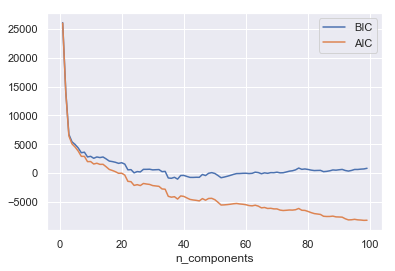

In [13]:
pca = PCA(n_components = 4, random_state = RANDOM_STATE) # Assigning PCA class (with n_components = 4) to a variable
train_data_ndim = pca.fit_transform(train_data) # Fit_transforming the train_data to PCA 
positive_data_ndim = train_data_ndim[train_labels == 1]  
negative_data_ndim = train_data_ndim[train_labels == 0]     
test_data_ndim = pca.transform(test_data)


n_components = np.arange(1, 100)
models = [GaussianMixture(n, covariance_type='full', random_state=RANDOM_STATE).fit(positive_data_ndim)
          for n in n_components]

plt.plot(n_components, [model.bic(positive_data_ndim) for model in models], label='BIC')
plt.plot(n_components, [model.aic(positive_data_ndim) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');